                                       **ASSIGNMENT - 4**

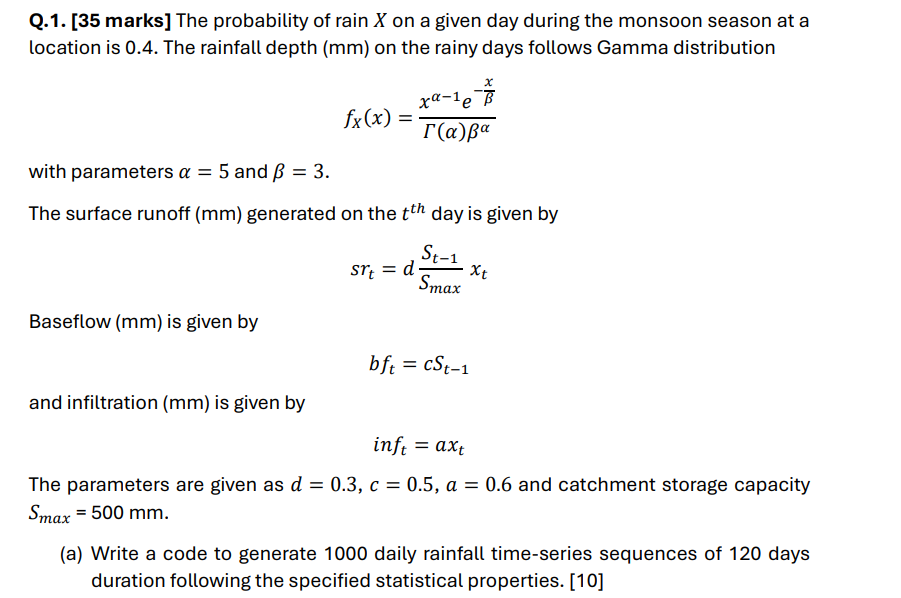

In [ ]:
import numpy as np

# Parameters
num_sequences = 1000
num_days = 120
rain_prob = 0.4
alpha = 5
beta = 3

# Initialize array to store rainfall sequences
rainfall_sequences = np.zeros((num_sequences, num_days))

# Generate sequences
for seq in range(num_sequences):
    for day in range(num_days):
        # Determine if it rains on this day
        if np.random.rand() < rain_prob:
            # Generate rainfall from Gamma distribution
            rainfall_sequences[seq, day] = np.random.gamma(shape=alpha, scale=beta)
        else:
            rainfall_sequences[seq, day] = 0.0

# print the first sequence
print("First rainfall sequence (mm):")
print(rainfall_sequences[0])

# Similarly we can print every other sequence through for loop


First rainfall sequence (mm):
[ 7.60714046  0.          0.          0.         23.42721191 29.47869818
  0.          0.          0.          9.02510729  0.          0.
  7.57175934  0.          0.          0.          0.          0.
  0.          9.0114907   0.          0.         28.68405281  0.
  0.          0.         17.10896459  9.22544704 12.30587816 21.48693842
 10.1898717   0.          0.          0.          0.         17.39826576
  0.          0.          3.95819669  0.          7.55478787  0.
 16.72204581  0.         17.45771465  8.84104492  0.          0.
  0.          0.          0.          0.          0.          0.
  0.         11.86936464 12.83994334 14.25342419  6.338579    0.
  0.         10.74298099  5.98906253  0.         22.58059189 14.51477426
 18.96110395  0.          0.          7.34559528  0.         14.01220433
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         16.8320671   0.
 16.35118386  0.    

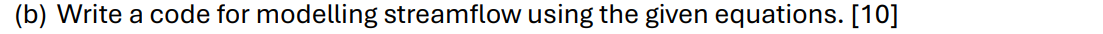

In [1]:
import numpy as np

# Parameters
num_sequences = 1000
num_days = 120
rain_prob = 0.4
alpha = 5
beta = 3
d = 0.3
c = 0.5
a = 0.6
S_max = 500

# Generate rainfall sequences (same as part a)
rainfall_sequences = np.zeros((num_sequences, num_days))
for seq in range(num_sequences):
    for day in range(num_days):
        if np.random.rand() < rain_prob:
            rainfall_sequences[seq, day] = np.random.gamma(shape=alpha, scale=beta)
        else:
            rainfall_sequences[seq, day] = 0.0

# Initialize output arrays
surface_runoff = np.zeros((num_sequences, num_days))
baseflow = np.zeros((num_sequences, num_days))
infiltration = np.zeros((num_sequences, num_days))
storage = np.zeros((num_sequences, num_days))
streamflow = np.zeros((num_sequences, num_days))

#  Model computation for each sequence
for seq in range(num_sequences):
    S_prev = 10  # initial storage (given in c part of the question)
    for t in range(num_days):
        x_t = rainfall_sequences[seq, t]

        sr_t = d * (S_prev / S_max) * x_t
        bf_t = c * S_prev
        inf_t = a * x_t

        # Update storage
        S_t = S_prev + inf_t - bf_t
        if S_t > S_max:  # ensure it doesn't exceed capacity
            S_t = S_max
        elif S_t < 0:
            S_t = 0

        # Streamflow
        Q_t = sr_t + bf_t

        # Store results
        surface_runoff[seq, t] = sr_t
        baseflow[seq, t] = bf_t
        infiltration[seq, t] = inf_t
        streamflow[seq, t] = Q_t
        storage[seq, t] = S_t

        # Update for next iteration
        S_prev = S_t

# Example output , similarly we can output any sequence
print("Example daily streamflow (first sequence):")
print(streamflow[0])


Example daily streamflow (first sequence):
[5.00000000e+01 2.50000000e+01 1.25000000e+01 6.37675343e+00
 8.30579385e+00 7.59274094e+00 7.97067620e+00 1.15254383e+01
 5.81488539e+00 5.30653770e+00 1.04490169e+01 5.22450844e+00
 2.61225422e+00 1.30612711e+00 6.53063555e-01 3.26531778e-01
 1.63265889e-01 8.16329444e-02 4.08164722e-02 2.04082361e-02
 1.04471368e-02 5.98933147e+00 4.33743403e+00 7.24635156e+00
 3.73157651e+00 9.42707073e+00 8.29978329e+00 4.18503561e+00
 4.26672584e+00 6.69257097e+00 8.87079767e+00 4.43539884e+00
 2.21769942e+00 1.10884971e+00 5.63208605e-01 4.23796112e+00
 2.11898056e+00 1.07668963e+00 4.70255424e+00 8.52798827e+00
 4.26399414e+00 2.13199707e+00 1.06599853e+00 5.32999267e-01
 2.72486136e-01 5.87517818e+00 8.54961170e+00 1.01400175e+01
 9.58417822e+00 4.79208911e+00 2.42950473e+00 4.68921129e+00
 2.38392671e+00 5.44945690e+00 6.69452865e+00 6.23157053e+00
 3.11578527e+00 1.55789263e+00 8.00836428e-01 7.41502513e+00
 3.75997248e+00 5.39116239e+00 2.69558120e

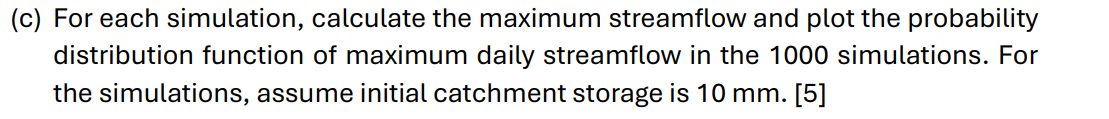

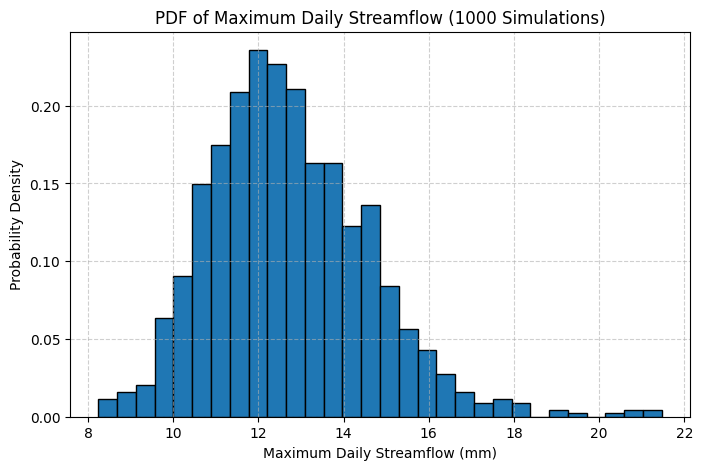

Mean of maximum streamflow: 12.73 mm
Standard deviation: 1.89 mm
Minimum: 8.24 mm, Maximum: 21.47 mm


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_sequences = 1000
num_days = 120
rain_prob = 0.4
alpha = 5
beta = 3
d = 0.3
c = 0.5
a = 0.6
S_max = 500
S_init = 10

# Generate rainfall sequences (as in part a)
rainfall_sequences = np.zeros((num_sequences, num_days))
for seq in range(num_sequences):
    for day in range(num_days):
        if np.random.rand() < rain_prob:
            rainfall_sequences[seq, day] = np.random.gamma(shape=alpha, scale=beta)
        else:
            rainfall_sequences[seq, day] = 0.0

# Initialize array to store maximum streamflow per simulation
max_streamflows = np.zeros(num_sequences)

# Model streamflow for each sequence
for seq in range(num_sequences):
    S_prev = S_init
    Q_sequence = np.zeros(num_days)

    for t in range(num_days):
        x_t = rainfall_sequences[seq, t]

        sr_t = d * (S_prev / S_max) * x_t
        bf_t = c * S_prev
        inf_t = a * x_t

        S_t = S_prev + inf_t - bf_t
        S_t = np.clip(S_t, 0, S_max)  # keep storage within [0, Smax]

        Q_t = sr_t + bf_t
        Q_sequence[t] = Q_t

        S_prev = S_t

    # Record maximum daily streamflow for this simulation
    max_streamflows[seq] = np.max(Q_sequence)

# Plot PDF of maximum streamflow
plt.figure(figsize=(8, 5))
plt.hist(max_streamflows, bins=30, density=True, edgecolor='black')
plt.title("PDF of Maximum Daily Streamflow (1000 Simulations)")
plt.xlabel("Maximum Daily Streamflow (mm)")
plt.ylabel("Probability Density")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Display some statistics
print(f"Mean of maximum streamflow: {np.mean(max_streamflows):.2f} mm")
print(f"Standard deviation: {np.std(max_streamflows):.2f} mm")
print(f"Minimum: {np.min(max_streamflows):.2f} mm, Maximum: {np.max(max_streamflows):.2f} mm")


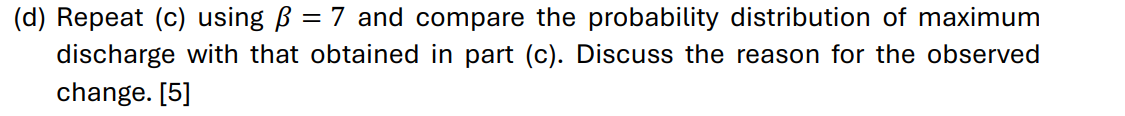

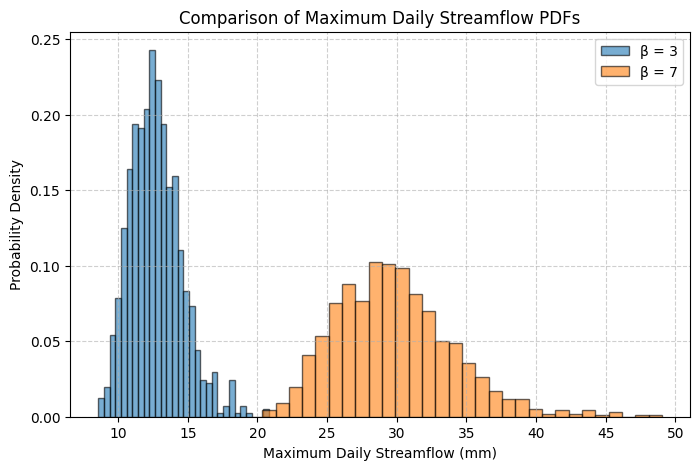

β = 3: Mean = 12.71, Std = 1.86, Max = 20.80
β = 7: Mean = 29.82, Std = 4.26, Max = 49.02


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_sequences = 1000
num_days = 120
rain_prob = 0.4
alpha = 5
beta_C = 3   # Part C
beta_D = 7   # Part D

d = 0.3
c = 0.5
a = 0.6
S_max = 500
S_init = 10

np.random.seed(42)  # For reproducibility , so that we will get the same values everytime

# Function to compute max streamflow given a beta
def max_streamflow(beta_value):
    max_Q = np.zeros(num_sequences)
    for seq in range(num_sequences):
        S_prev = S_init
        Q_seq = np.zeros(num_days)
        for t in range(num_days):
            # Rainfall generation
            x_t = np.random.gamma(shape=alpha, scale=beta_value) if np.random.rand() < rain_prob else 0.0

            sr_t = d * (S_prev / S_max) * x_t
            bf_t = c * S_prev
            inf_t = a * x_t

            # Update storage
            S_t = np.clip(S_prev + inf_t - bf_t, 0, S_max)

            # Total streamflow
            Q_seq[t] = sr_t + bf_t
            S_prev = S_t

        # Maximum daily streamflow for this simulation
        max_Q[seq] = np.max(Q_seq)
    return max_Q

# Compute maximum streamflow for both cases
max_C = max_streamflow(beta_C)
max_D = max_streamflow(beta_D)

# Plot PDFs for comparison
plt.figure(figsize=(8,5))
plt.hist(max_C, bins=30, density=True, alpha=0.6, label='β = 3', edgecolor='black')
plt.hist(max_D, bins=30, density=True, alpha=0.6, label='β = 7', edgecolor='black')
plt.title("Comparison of Maximum Daily Streamflow PDFs")
plt.xlabel("Maximum Daily Streamflow (mm)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Display summary statistics
print("β = 3: Mean = {:.2f}, Std = {:.2f}, Max = {:.2f}".format(np.mean(max_C), np.std(max_C), np.max(max_C)))
print("β = 7: Mean = {:.2f}, Std = {:.2f}, Max = {:.2f}".format(np.mean(max_D), np.std(max_D), np.max(max_D)))


Increasing β increases the mean storm depth and rainfall variability. This leads to higher surface runoff due to infiltration exceedance and enhanced baseflow recharge, both contributing to larger peak flows. Consequently, the probability distribution of maximum discharge shifts toward higher values and becomes broader, reflecting a higher risk of extreme floods.

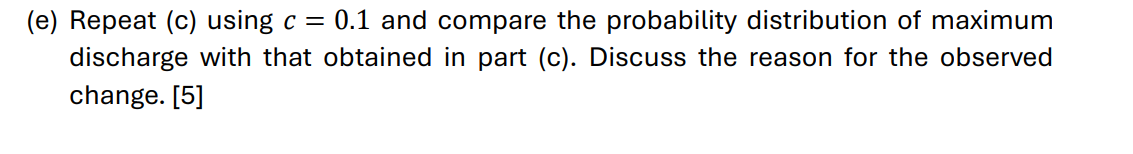

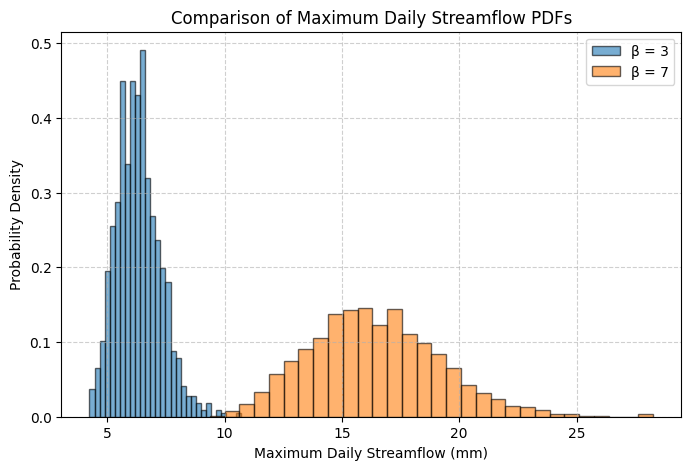

β = 3: Mean = 6.32, Std = 0.94, Max = 10.72
β = 7: Mean = 16.40, Std = 2.79, Max = 28.26


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_sequences = 1000
num_days = 120
rain_prob = 0.4
alpha = 5
beta_C = 3   # Part C
beta_D = 7   # Part D

d = 0.3
c = 0.1
a = 0.6
S_max = 500
S_init = 10

np.random.seed(42)  # For reproducibility , so that we will get the same values everytime

# Function to compute max streamflow given a beta
def max_streamflow(beta_value):
    max_Q = np.zeros(num_sequences)
    for seq in range(num_sequences):
        S_prev = S_init
        Q_seq = np.zeros(num_days)
        for t in range(num_days):
            # Rainfall generation
            x_t = np.random.gamma(shape=alpha, scale=beta_value) if np.random.rand() < rain_prob else 0.0

            sr_t = d * (S_prev / S_max) * x_t
            bf_t = c * S_prev
            inf_t = a * x_t

            # Update storage
            S_t = np.clip(S_prev + inf_t - bf_t, 0, S_max)

            # Total streamflow
            Q_seq[t] = sr_t + bf_t
            S_prev = S_t

        # Maximum daily streamflow for this simulation
        max_Q[seq] = np.max(Q_seq)
    return max_Q

# Compute maximum streamflow for both cases
max_C = max_streamflow(beta_C)
max_D = max_streamflow(beta_D)

# Plot PDFs for comparison
plt.figure(figsize=(8,5))
plt.hist(max_C, bins=30, density=True, alpha=0.6, label='β = 3', edgecolor='black')
plt.hist(max_D, bins=30, density=True, alpha=0.6, label='β = 7', edgecolor='black')
plt.title("Comparison of Maximum Daily Streamflow PDFs")
plt.xlabel("Maximum Daily Streamflow (mm)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Display summary statistics
print("β = 3: Mean = {:.2f}, Std = {:.2f}, Max = {:.2f}".format(np.mean(max_C), np.std(max_C), np.max(max_C)))
print("β = 7: Mean = {:.2f}, Std = {:.2f}, Max = {:.2f}".format(np.mean(max_D), np.std(max_D), np.max(max_D)))


When the baseflow coefficient c is reduced from 0.5 to 0.1, the slow groundwater-release component of flow (bf_t = c·S_{t-1}) becomes much smaller. In our model formulation streamflow is the sum of surface runoff and baseflow (Q = sr + bf), and infiltration is routed into storage rather than instantly into streamflow. Therefore reducing c directly reduces the daily baseflow contribution and results in substantially lower daily and peak flows. This is why the mean maximum daily discharge decreased from 12.75 mm (c=0.5) to 6.31 mm (c=0.1)

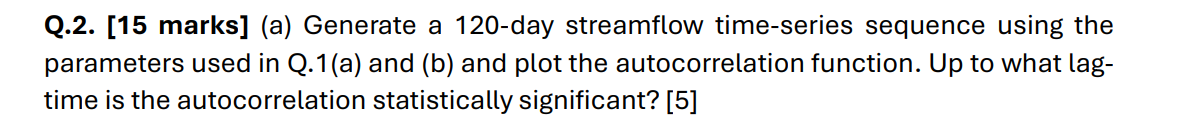

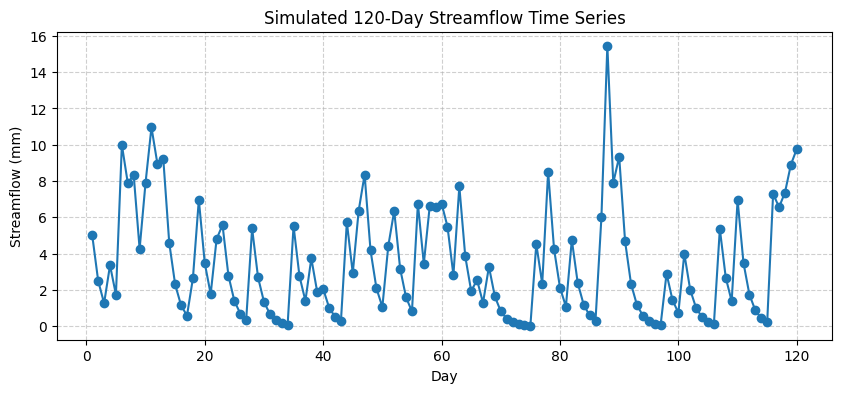

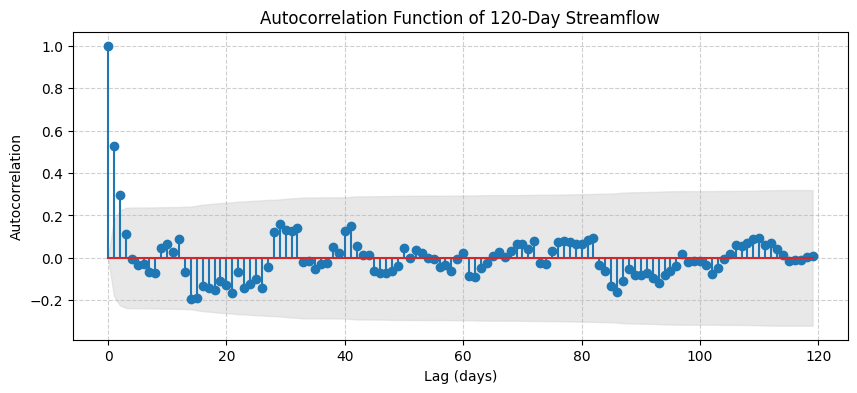

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

# PARAMETERS
num_days = 120
rain_prob = 0.4
alpha = 5
beta = 3
d = 0.3
c = 0.5
a = 0.6
S_max = 500
S_init = 10

# Generate 120-day rainfall sequence
rainfall = np.zeros(num_days)
for t in range(num_days):
    if np.random.rand() < rain_prob:
        rainfall[t] = np.random.gamma(shape=alpha, scale=beta)
    else:
        rainfall[t] = 0.0

# Compute streamflow sequence
streamflow = np.zeros(num_days)
S_prev = S_init

for t in range(num_days):
    x_t = rainfall[t]

    sr_t = d * (S_prev / S_max) * x_t
    bf_t = c * S_prev
    inf_t = a * x_t

    S_t = np.clip(S_prev + inf_t - bf_t, 0, S_max)
    Q_t = sr_t + bf_t
    streamflow[t] = Q_t
    S_prev = S_t

# Plot the 120-day streamflow time series
plt.figure(figsize=(10,4))
plt.plot(range(1,num_days+1), streamflow, marker='o')
plt.title("Simulated 120-Day Streamflow Time Series")
plt.xlabel("Day")
plt.ylabel("Streamflow (mm)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Compute autocorrelation function using statsmodels
acf_values, confint = acf(streamflow, nlags=num_days-1, alpha=0.05)  # 95% confidence

lags = np.arange(len(acf_values))

# Plot ACF with confidence intervals
plt.figure(figsize=(10,4))
plt.stem(lags, acf_values)
plt.fill_between(lags, confint[:,0] - acf_values, confint[:,1] - acf_values, color='lightgrey', alpha=0.5)
plt.title("Autocorrelation Function of 120-Day Streamflow")
plt.xlabel("Lag (days)")
plt.ylabel("Autocorrelation")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


So from plot , we can see that 3 days autocorrelation is getting out of the 95% confidnece interval . Therefore upto 3 lag the auto-correlations is significant .

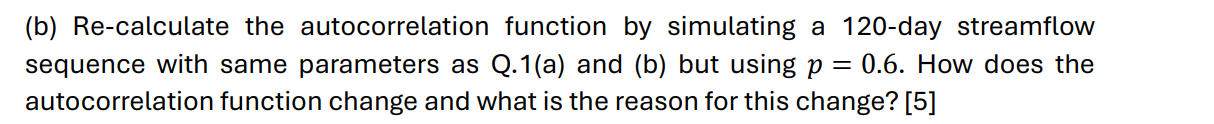

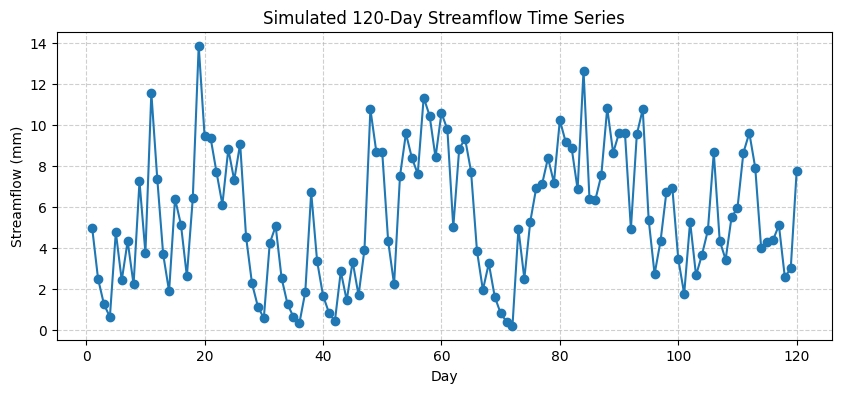

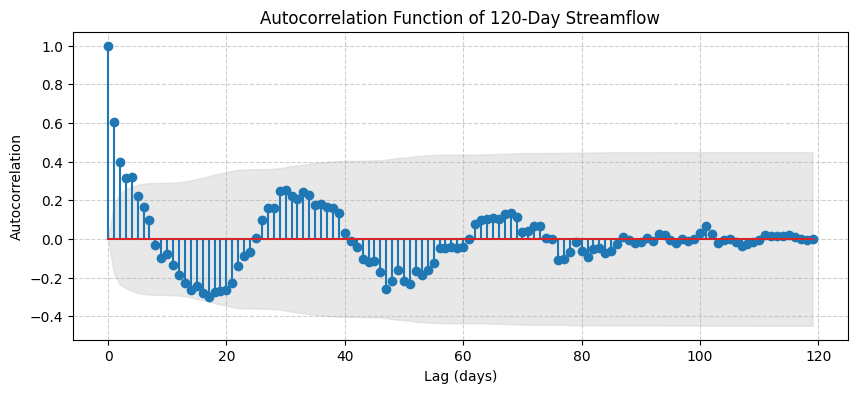

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

# PARAMETERS
num_days = 120
rain_prob = 0.6
alpha = 5
beta = 3
d = 0.3
c = 0.5
a = 0.6
S_max = 500
S_init = 10

# Generate 120-day rainfall sequence
rainfall = np.zeros(num_days)
for t in range(num_days):
    if np.random.rand() < rain_prob:
        rainfall[t] = np.random.gamma(shape=alpha, scale=beta)
    else:
        rainfall[t] = 0.0

# Compute streamflow sequence
streamflow = np.zeros(num_days)
S_prev = S_init

for t in range(num_days):
    x_t = rainfall[t]

    sr_t = d * (S_prev / S_max) * x_t
    bf_t = c * S_prev
    inf_t = a * x_t

    S_t = np.clip(S_prev + inf_t - bf_t, 0, S_max)
    Q_t = sr_t + bf_t
    streamflow[t] = Q_t
    S_prev = S_t

# Plot the 120-day streamflow time series
plt.figure(figsize=(10,4))
plt.plot(range(1,num_days+1), streamflow, marker='o')
plt.title("Simulated 120-Day Streamflow Time Series")
plt.xlabel("Day")
plt.ylabel("Streamflow (mm)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Compute autocorrelation function using statsmodels
acf_values, confint = acf(streamflow, nlags=num_days-1, alpha=0.05)  # 95% confidence

lags = np.arange(len(acf_values))

# Plot ACF with confidence intervals
plt.figure(figsize=(10,4))
plt.stem(lags, acf_values)
plt.fill_between(lags, confint[:,0] - acf_values, confint[:,1] - acf_values, color='lightgrey', alpha=0.5)
plt.title("Autocorrelation Function of 120-Day Streamflow")
plt.xlabel("Lag (days)")
plt.ylabel("Autocorrelation")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


So from plot , we can see that 5 days autocorrelation is getting out of the 95% confidnece interval . Therefore upto 3 lag the auto-correlations is significant .

When the rainfall probability (p) increases from 0.4 to 0.6, rainfall occurs more frequently, leading to higher catchment wetness. The soil and subsurface layers remain saturated, maintaining a steady baseflow component and reducing the variability in infiltration and surface runoff response between consecutive days. Consequently, streamflow on one day becomes more correlated with that of the previous days, causing the autocorrelation function to decay more slowly. Physically, this means the catchment retains water for longer — hence the increase in statistically significant lag days (from 3 to 5).

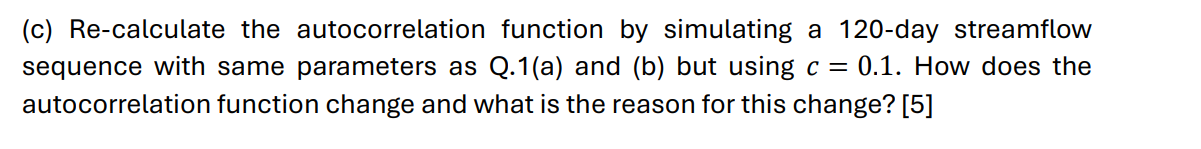

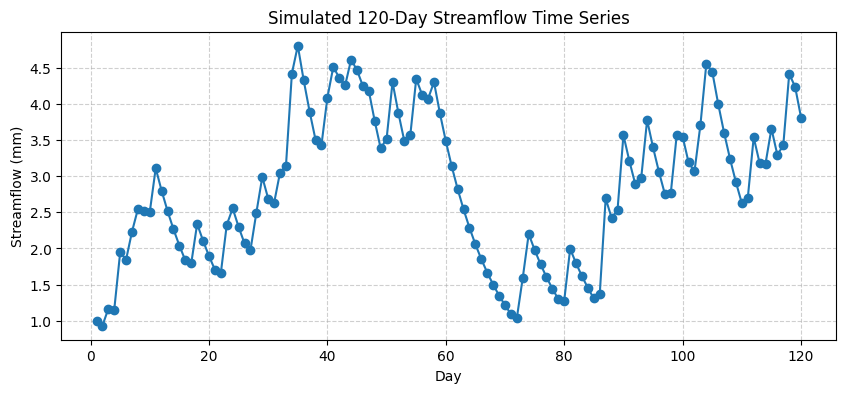

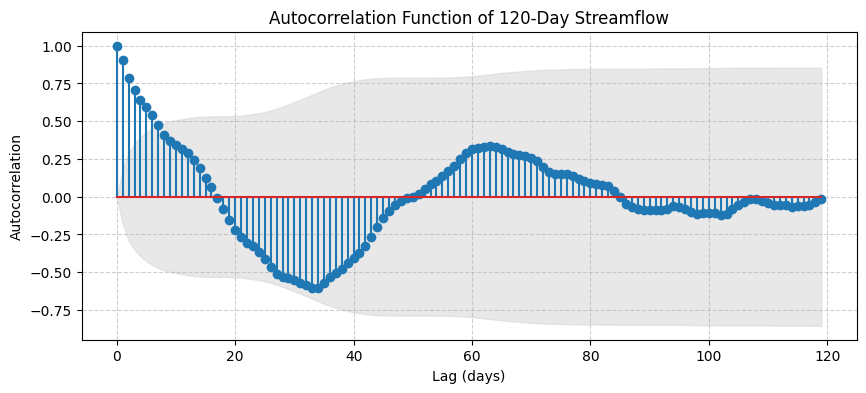

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

# PARAMETERS
num_days = 120
rain_prob = 0.4
alpha = 5
beta = 3
d = 0.3
c = 0.1
a = 0.6
S_max = 500
S_init = 10

# Generate 120-day rainfall sequence
rainfall = np.zeros(num_days)
for t in range(num_days):
    if np.random.rand() < rain_prob:
        rainfall[t] = np.random.gamma(shape=alpha, scale=beta)
    else:
        rainfall[t] = 0.0

# Compute streamflow sequence
streamflow = np.zeros(num_days)
S_prev = S_init

for t in range(num_days):
    x_t = rainfall[t]

    sr_t = d * (S_prev / S_max) * x_t
    bf_t = c * S_prev
    inf_t = a * x_t

    S_t = np.clip(S_prev + inf_t - bf_t, 0, S_max)
    Q_t = sr_t + bf_t
    streamflow[t] = Q_t
    S_prev = S_t

# Plot the 120-day streamflow time series
plt.figure(figsize=(10,4))
plt.plot(range(1,num_days+1), streamflow, marker='o')
plt.title("Simulated 120-Day Streamflow Time Series")
plt.xlabel("Day")
plt.ylabel("Streamflow (mm)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Compute autocorrelation function using statsmodels
acf_values, confint = acf(streamflow, nlags=num_days-1, alpha=0.05)  # 95% confidence

lags = np.arange(len(acf_values))

# Plot ACF with confidence intervals
plt.figure(figsize=(10,4))
plt.stem(lags, acf_values)
plt.fill_between(lags, confint[:,0] - acf_values, confint[:,1] - acf_values, color='lightgrey', alpha=0.5)
plt.title("Autocorrelation Function of 120-Day Streamflow")
plt.xlabel("Lag (days)")
plt.ylabel("Autocorrelation")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


So from plot , we can see that 7 days autocorrelation is getting out of the 95% confidnece interval . Therefore upto 3 lag the auto-correlations is significant .

When the baseflow coefficient c is reduced, the rate of groundwater discharge from storage decreases. This means that the catchment retains water for a longer period, maintaining a residual flow even after rainfall stops. As a result, the current day’s streamflow depends more strongly on flows from several previous days, increasing the persistence in the time series. Consequently, the autocorrelation function decays more gradually, leading to more statistically significant lag days (from 3 to 7).